# Lecture 14 - UC Merced Enrollment Data
### Spark 010 -- Spring 2024

In this notebook, we will look at data on applications to UC Merced from 2018 to 2024.

In [ ]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.options.display.width = 0
pd.options.display.max_colwidth = 10
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("enrollment.csv")

In [ ]:
df.head()

The columns are:

- `'TERM_CODE_KEY'`: Year and Term Code (10 for Spring and 30 for Fall)
- `'SID'`: Student ID (made-up for anonymity)
- `'ENTERINGLEVEL'`: Freshman or Transfer
- `'MAJR_DESC'`: Major of the applicant
- `'ADMITTED'`: Whether the student was addmitted (Y or N)
- `'GENDER'`: Student's gender


## Part 1 - Data Cleaning

### Question 1:
What are the distinct values found in the column `'TERM_CODE_KEY'`? One way to answer this would be to use `df['col_name'].unique()` or `df['col_name'].value_counts()` 

In [ ]:
# Fill in ... with your answer
TermCodeValues = ...
TermCodeValues

### Pre-processing the `TERM_CODE_KEY` column

Let's **split** the TERM_CODE_KEY column into two, making two **new** columns `'YEAR'` and `'TERM'`. This will be useful later on when grouping our dataset by year.

In [ ]:
# just run me
def get_year(code):
    # return only the first four digits of the term_code_key column
    return int(str(code)[:4])

In [ ]:
df['YEAR'] = df['TERM_CODE_KEY'].apply(get_year)

In [ ]:
# just run me
def get_term(code):
    term_code = str(code)[-2:]
    if term_code == '30':
        return 'Fall' # 30 is the code for Fall
    elif term_code == '10':
        return 'Spring' # 10 is the code for Fall
    else:
        return None

In [ ]:
df['TERM'] = df['TERM_CODE_KEY'].apply(get_term)

In [ ]:
df.head()

As you can see, we now have two extra columns in our table. Now that we have gotten the information we need from `TERM_CODE_KEY`, we can drop it from our table, along with `'SID'`.

### Problem 2:
Use `df.drop()` to drop `'TERM_CODE_KEY'` and `'SID'` from our table.

In [ ]:
# Fill in the ... with the appropriate column labels

df = df.drop(columns = [ ... , ... ])

In [ ]:
df.head()

In [ ]:
df.tail()

## Part 2 - Visualizing the enrollment data

### Value Counts and Distribution Tables

### Question 3:
One question we may have is, "What are the most popular majors?" Use `value_counts()` to find the top ten majors in terms of number of applicants.

In [ ]:
# Put your answer to question 3 here

major_counts = ...
major_counts

Now we can use `df.plot.barh` to plot the top 10 majors in a horizontal bar chart.

In [ ]:
Plot = major_counts.head(10).plot.barh()

### Problem 4:
Make a horizontal bar chart that plots the **top five majors** for **transfer students only**\. Be sure to use `value_counts()` on the `'MAJR_DESC'` column.

In [ ]:
# Fill in the ... with your answer


# Filter so that we only have Transfer students
Filter = ...
Transfer_Students = df[Filter]


# Get the value counts for the MAJR_DESC columns

major_counts = ...


# Plot

Plot = ...

### Plotting Stacked Bar Charts using groupby

We've seen in class how to plot more than one bar chart side-by-side to visualize multiple variable at once. This time, let's do the same, but using `df.groupby()`, looking at the top 5 majors in terms of number of applicants in the year 2023. We will then plot these top 5 majors along with admission rate percentages.

Filter the `df` table so that it only includes 2023 applicants.

In [ ]:
# Fill in the ... with your answer

# Filter the data to only include 2023
Filter = ...
df_2023 = df[Filter]
df_2023.head()

Now to make a list of the top 5 majors in 2023, we can use the index of value_counts

In [45]:
# just run me

# Make a list of the top 5 majors in 2023 by applicant count
Top5_list = df_2023['MAJR_DESC'].value_counts().head(5).index.tolist()
Top5_list

['Undeclared',
 'Biological Sciences',
 'Computer Science & Engineering',
 'Management &Business Economics',
 'Psychology']

Not we need to filter `df_2023` so that it only includes majors from `Top5_list`. Remember to use `df['col_name'].isin()`

In [ ]:
# Fill in the ... with your answer

# Filter to only include these top 5 majors
Filter = ...
Top5_2023 = df_2023[Filter]

Top5_2023.head()

### Plotting stacked bar charts -- Advanced

Now we can make a nice bar chart with more adanced information.

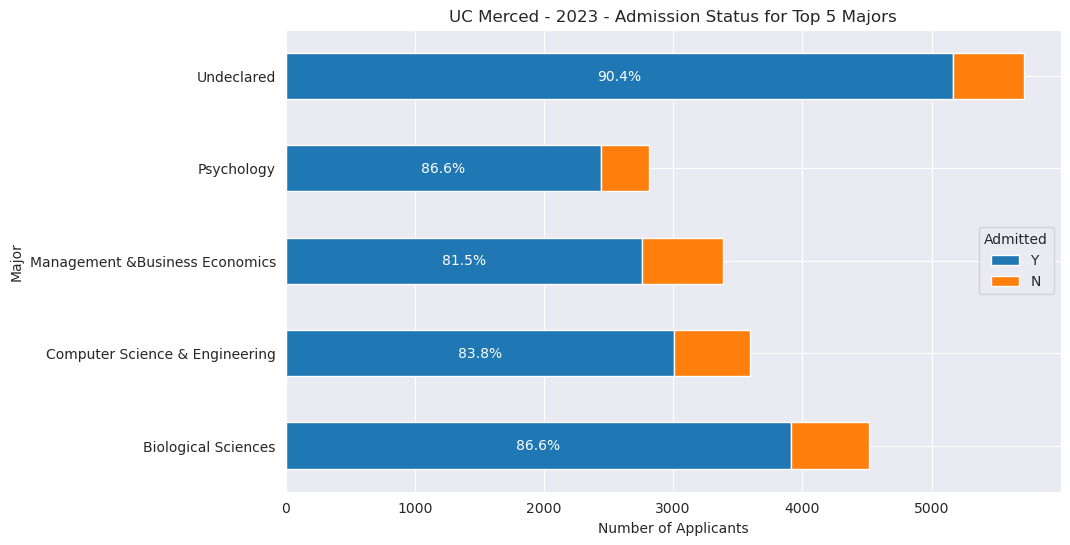

In [42]:
# just run me

filtered_data = Top5_2023

# Group by major and admitted status, and calculate the percentage admitted
grouped = filtered_data.groupby(['MAJR_DESC', 'ADMITTED']).size().unstack(fill_value=0)
grouped['Total'] = grouped['Y'] + grouped['N']
grouped['Percent Admitted'] = grouped['Y'] / grouped['Total'] * 100

# Plotting the stacked bar chart
colors = {'Y': '#1f77b4', 'N': '#ff7f0e'}
ax = grouped[['Y', 'N']].plot(kind='barh', stacked=True, color=[colors[col] for col in ['Y','N']], figsize=(10, 6))

# Add text for percentage admitted
for i, (index, row) in enumerate(grouped.iterrows()):
    ax.text(row['Y'] / 2, i, f"{row['Percent Admitted']:.1f}%", ha='center', va='center', color='white')

# Customizing the plot
plt.title('UC Merced - 2023 - Admission Status for Top 5 Majors')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admitted', loc='right')

# Show the plot
plt.show()

## Part 3 - Open-Ended questions

### Question 5: 

Answer one of the following questions of your choice.

- Which majors have the most Female students applying?
- Which majors have the highest percentage of students applying that are Female?
- Are Transfer students more likely to be admitted?
- Do Transfer students choose to apply in similar majors as Freshman applicants?
- What majors are the hardest/easiest to get admitted into?

In [ ]:
# Put your code for question 4 here



### Question 6:
Answer your own personal question you may have on the data. Pick something you would find interesting to look at given this dataset. Write a short summary reflection about your findings (two to three sentences). And make sure to comment your code so that we know what you are trying to do.

In [ ]:
# Put your code for question 5 here



Put your reflection in this cell (double-click the cell to enter it):
</br>
</br>





</br>
</br>
End reflection

## Conclusion

What type of datasets would you enjoy working with in this class?

# Submission

Make sure you have run all cells in your notebook so that all images/graphs (if any) appear in the output before preparing to submit your work.  **Please create a PDF using File->Save and Export Notebook as->PDF**, then upload this document to the appropriate assignment on Catcourses.